## Project Objective / Business Relevance

The aim of this project is to group bank customers using their transaction behaviour. This will be done using RFM analysis which is a powerful method to quantify behaviour using the following criteria:
- Recency: how recent a customer has made a purchase
- Frequency: how frequently a customer makes purchases
- Monetary: how much money a customer spends

The results of this project are extremely useful from a marketing perspective to tailer targeted marketing strategies based on customer behaviour to guide promotional content.


In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [284]:
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

## Importing and Cleaning Data

The bank_transactions dataset was taken from kaggle at https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation. The dataset contains over 1 million transactions from an Indian Bank.

In [285]:
# Importing bank transactions data
bank_df = pd.read_csv('bank_transactions.csv')
bank_df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


First the columns that would be used for demographic segmentation but are not of interest to us are removed. In addition, the account balance and the transaction time will not be used. Only the transaction date will be used for recency as the number of days since the last transaction is sufficient information for the recency criteria.

In [286]:
# Dropping columns that won't be used
bank_df = bank_df.drop(['CustomerDOB', 'CustGender', 'CustLocation', 'CustAccountBalance', 'TransactionTime'], axis=1)
bank_df

,TransactionID,CustomerID,TransactionDate,TransactionAmount (INR)
0,T1,C5841053,2/8/16,25.0
1,T2,C2142763,2/8/16,27999.0
2,T3,C4417068,2/8/16,459.0
3,T4,C5342380,2/8/16,2060.0
4,T5,C9031234,2/8/16,1762.5
...,...,...,...,...
1048562,T1048563,C8020229,18/9/16,799.0
1048563,T1048564,C6459278,18/9/16,460.0
1048564,T1048565,C6412354,18/9/16,770.0
1048565,T1048566,C6420483,18/9/16,1000.0


In [287]:
# Checking for missing values
bank_df.isna().sum()

TransactionID              0
CustomerID                 0
TransactionDate            0
TransactionAmount (INR)    0
dtype: int64

There are no missing values in the remaining columns.

In [288]:
# Showing column data types
bank_df.dtypes

TransactionID               object
CustomerID                  object
TransactionDate             object
TransactionAmount (INR)    float64
dtype: object

In [289]:
# Displaying number of unique dates in dataset
bank_df['TransactionDate'].unique()

array(['2/8/16', '1/8/16', '3/8/16', '5/8/16', '4/8/16', '6/8/16',
       '9/8/16', '8/8/16', '12/8/16', '7/8/16', '21/10/16', '16/10/16',
       '10/8/16', '14/8/16', '17/8/16', '21/8/16', '19/8/16', '24/8/16',
       '22/8/16', '29/8/16', '31/8/16', '22/9/16', '23/9/16', '13/8/16',
       '25/8/16', '28/8/16', '15/8/16', '27/8/16', '20/8/16', '23/8/16',
       '30/8/16', '11/8/16', '16/8/16', '26/8/16', '27/9/16', '18/8/16',
       '25/9/16', '26/9/16', '30/9/16', '3/9/16', '2/9/16', '1/9/16',
       '6/9/16', '5/9/16', '4/9/16', '9/9/16', '8/9/16', '7/9/16',
       '12/9/16', '11/9/16', '10/9/16', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

From the date entries it is clear that the dates are spread out over 3 months in 2016 (Aug, Sep, Oct) so the format is day/month/year.

In [290]:
# Converting TransactionDate type to DateTime
from datetime import date
bank_df['TransactionDate'] = pd.to_datetime(bank_df['TransactionDate'], format="%d/%m/%y")
bank_df['TransactionDate']

0         2016-08-02
1         2016-08-02
2         2016-08-02
3         2016-08-02
4         2016-08-02
             ...    
1048562   2016-09-18
1048563   2016-09-18
1048564   2016-09-18
1048565   2016-09-18
1048566   2016-09-18
Name: TransactionDate, Length: 1048567, dtype: datetime64[ns]

We would convert the transaction amount values from Indian Rupees (INR) to CAD or USD to make it more interpretable. However, prices for goods and services in India likely not likely proportional to currency conversions. For example $20 USD might be able to buy much more in India than in the US. The amount will therefore be kept in INR.

In [291]:
# Renaming transaction amount column
bank_df.rename(columns={'TransactionAmount (INR)': 'Amount', 'TransactionDate': 'Date'}, inplace=True)

In [292]:
# Looking at transaction amount distribution stats
bank_df.describe()

,Date,Amount
count,1048567,1.048567e+06
mean,2016-08-25 04:33:33.797497600,1.574335e+03
min,2016-08-01 00:00:00,0.000000e+00
25%,2016-08-12 00:00:00,1.610000e+02
50%,2016-08-25 00:00:00,4.590300e+02
75%,2016-09-06 00:00:00,1.200000e+03
max,2016-10-21 00:00:00,1.560035e+06
std,NaN,6.574743e+03


From the describe dataframe, we see that the minimum transaction amount is 0. This doesn't make sense in the context of our problem so observations with TransactionAmount of 0 will be removed.

In [293]:
# Determining rows to drop with 0 transaction amount
zero_amount_rows = bank_df[bank_df['Amount'] == 0]
rows_to_drop = zero_amount_rows.index
# Dropping specified rows
bank_df.drop(labels=rows_to_drop, axis=0, inplace=True)
bank_df.shape

(1047732, 4)

In [294]:
# Ensuring all transactionID values are unique
if bank_df['TransactionID'].nunique() == len(bank_df):
    print("There are no duplicate transaction ID's")

There are no duplicate transaction ID's


In [295]:
duplicates = bank_df.duplicated(subset='TransactionID')
duplicates.any()

False

## Feature Engineering and Data Exploration

The existing features will now be transformed into features used for RFM. The RFM features will be obtained as follows:
- **Recency**: the number of days since the customer's last purchase will be calculated. This will be done using a reference date, which will be 2016-10-22 since it is one day after the latest date in the dataset (2016-10-21). The date of most recent purchase will then be subtracted from this reference date for each customer
- **Frequency**: the number of total transactions from each customer during the time period.
- **Monetary**: the average purchase amount calculated by dividing total amount spent by number of transactions

In [296]:
# Making reference date for recency
ref_date = pd.to_datetime('22/10/16', format="%d/%m/%y")
ref_date

Timestamp('2016-10-22 00:00:00')

In [297]:
# Using pandas groupby.agg to group the observations by CustomerID then applying specific functions to each column to obtain the RFM variables
rfm_df = bank_df.groupby('CustomerID').agg({'Date': lambda x: (ref_date - x.max()), 'TransactionID': 'count', 'Amount': 'sum'})
rfm_df

,Date,TransactionID,Amount
CustomerID,,,
C1010011,26 days,2,5106.0
C1010012,69 days,1,1499.0
C1010014,76 days,2,1455.0
C1010018,37 days,1,30.0
C1010024,65 days,1,5000.0
...,...,...,...
C9099836,76 days,1,691.0
C9099877,37 days,1,222.0
C9099919,65 days,1,126.0


In [298]:
# Renaming column as RFM variables
rfm_df.rename(columns={'Date':'Recency', 'TransactionID':'Frequency', 'Amount':'Monetary'}, inplace=True)
# Dividing total amount spent by number of transactions
rfm_df['Monetary'] = rfm_df['Monetary'] / rfm_df['Frequency']
# Removing 'days' from Recency
rfm_df['Recency'] = rfm_df['Recency'].dt.days
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,26,2,2553.0
C1010012,69,1,1499.0
C1010014,76,2,727.5
C1010018,37,1,30.0
C1010024,65,1,5000.0
...,...,...,...
C9099836,76,1,691.0
C9099877,37,1,222.0
C9099919,65,1,126.0


In [299]:
# Examining the distribution statistics
rfm_df.describe()

,Recency,Frequency,Monetary
count,883660.000000,883660.000000,8.836600e+05
mean,56.306991,1.185673,1.576040e+03
std,15.226267,0.450527,6.445248e+03
min,1.000000,1.000000,1.000000e-02
25%,44.000000,1.000000,1.930000e+02
50%,56.000000,1.000000,5.000000e+02
75%,69.000000,1.000000,1.249020e+03
max,82.000000,6.000000,1.560035e+06


The distribution statistics show that the Recency and frequency have a relatively small range. However the Monetary values are spread across several different orders of magnitude. Although we want to keep customer information as much as possible, clustering is sensitive to outliers. Therefore the large outliers in the monetary column will be removed.

In [300]:
# Removing outlier observations
from scipy import stats
# Keeping values for which z-score is smaller 3 (less than 3 standard deviations from the mean)
keep = (np.abs(stats.zscore(rfm_df['Monetary'])) < 3)
rfm_df_filtered = rfm_df[keep]
rfm_df_filtered

,Recency,Frequency,Monetary
CustomerID,,,
C1010011,26,2,2553.0
C1010012,69,1,1499.0
C1010014,76,2,727.5
C1010018,37,1,30.0
C1010024,65,1,5000.0
...,...,...,...
C9099836,76,1,691.0
C9099877,37,1,222.0
C9099919,65,1,126.0


In [301]:
rfm_df_filtered.describe()

,Recency,Frequency,Monetary
count,875808.000000,875808.000000,875808.000000
mean,56.304472,1.186078,1176.400496
std,15.221965,0.451015,2135.207340
min,1.000000,1.000000,0.010000
25%,44.000000,1.000000,190.000000
50%,56.000000,1.000000,499.000000
75%,69.000000,1.000000,1200.000000
max,82.000000,6.000000,20910.000000


We see that the monetary values are now in a much more reasonable range.

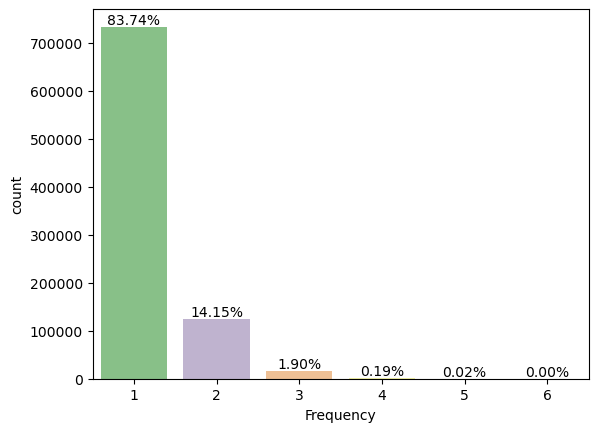

In [302]:
sns.set_palette('Accent')
# Plotting amount of transactions per customer
ax = sns.countplot(data=rfm_df_filtered, x='Frequency')
# Adding percentage labels to bars
percentages = rfm_df_filtered['Frequency'].value_counts() / len(rfm_df_filtered)
percentages_formatted = percentages.apply(lambda x: f"{x*100:.2f}%")
ax.bar_label(container=ax.containers[0], labels=percentages_formatted)
plt.show()

From the count plot above it is clear that the majority of customers have made only one transaction while a much smaller portion have made 2 or 3. Let's plot the variables now to see their distributions.

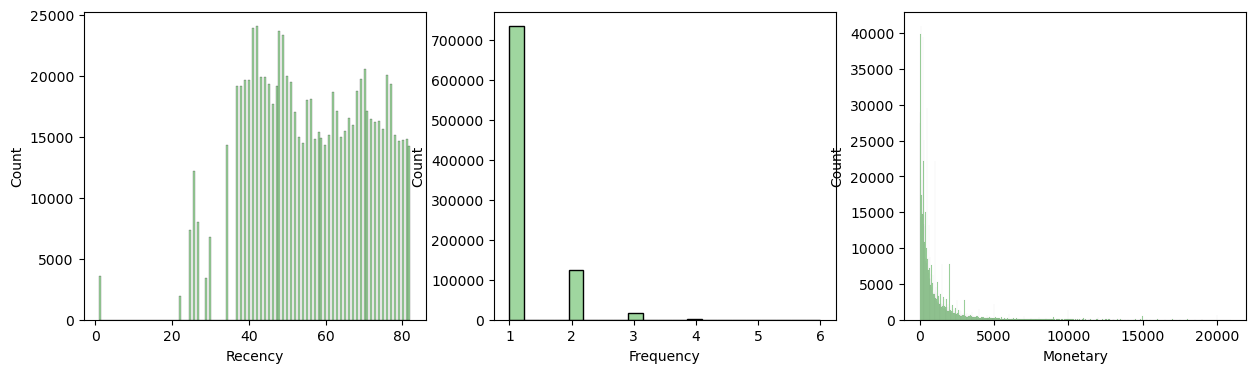

In [303]:
# format of 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15,4))
# create histograms
for i, col in enumerate(rfm_df_filtered.columns):
    sns.histplot(data=rfm_df_filtered, x=col, ax=axes[i])
plt.show()

From the histograms above, we can see that the frequency and monetary features follow clear power law distributions. They will be transformed using a log function which should make their distributions appear roughly normal.

The recency feature doesn't follow any clear distribution. It is clear though that most transactions occured in the first half of the timeframe under study as most transactions are between 40-80 days ago.

In [304]:
from scipy.stats import boxcox
rfm_df_filtered['Frequency_log'] = np.log(rfm_df_filtered['Frequency'])
rfm_df_filtered['Monetary_log'] = np.log(rfm_df_filtered['Monetary'])
rfm_df_filtered

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_42079/4090778646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_filtered['Frequency_log'] = np.log(rfm_df_filtered['Frequency'])
/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_42079/4090778646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_filtered['Monetary_log'] = np.log(rfm_df_filtered['Monetary'])


,Recency,Frequency,Monetary,Frequency_log,Monetary_log
CustomerID,,,,,
C1010011,26,2,2553.0,0.693147,7.845024
C1010012,69,1,1499.0,0.000000,7.312553
C1010014,76,2,727.5,0.693147,6.589614
C1010018,37,1,30.0,0.000000,3.401197
C1010024,65,1,5000.0,0.000000,8.517193
...,...,...,...,...,...
C9099836,76,1,691.0,0.000000,6.538140
C9099877,37,1,222.0,0.000000,5.402677
C9099919,65,1,126.0,0.000000,4.836282


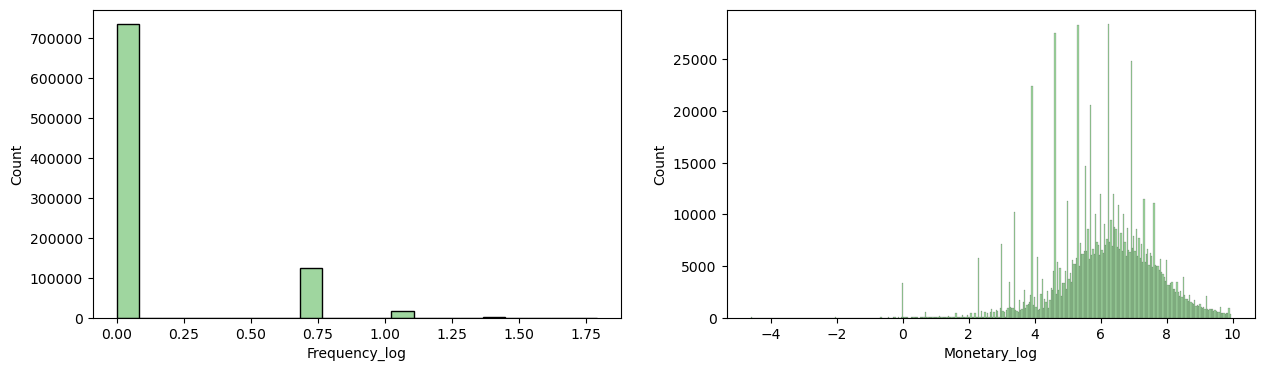

In [305]:
# Plotting the newly log transformed distributions
# format of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15,4))
# create histograms
for i, col in enumerate(rfm_df_filtered.columns[-2:]):
    sns.histplot(data=rfm_df_filtered, x=col, ax=axes[i])
plt.show()

The log transformation has made the monetary feature's distribution roughly normal. However, the distribution of the frequency feature remains heavily skewed.

In [306]:
# Removing original monetary and frequency features
rfm_df_filtered.drop(['Monetary', 'Frequency'], axis=1, inplace=True)
rfm_df_filtered.columns

/var/folders/lw/b_8l9ggd16z8sjbbwh204hf40000gn/T/ipykernel_42079/1290183852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df_filtered.drop(['Monetary', 'Frequency'], axis=1, inplace=True)


Index(['Recency', 'Frequency_log', 'Monetary_log'], dtype='object')

In [307]:
# Checking if applying log has made some values infinity
np.isinf(rfm_df_filtered).any()

Recency          False
Frequency_log    False
Monetary_log     False
dtype: bool

**Justification for MinMaxScaler**: Although the monetary distribution is now normal, the other two features do not have normal dsitributions. Therefore StandardScaler won't be used since its works best for normal distributions. MinMaxScaler will be used instead because it works well on a wide range of distributions. We have also removed all major outliers so there is no need for a scaler that is robust to outliers.

In [308]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(rfm_df_filtered)
scaled_df = pd.DataFrame(scaled_array, index=rfm_df_filtered.index, columns=rfm_df_filtered.columns)
scaled_df

,Recency,Frequency_log,Monetary_log
CustomerID,,,
C1010011,0.308642,0.386853,0.855498
C1010012,0.839506,0.000000,0.818910
C1010014,0.925926,0.386853,0.769234
C1010018,0.444444,0.000000,0.550147
C1010024,0.790123,0.000000,0.901685
...,...,...,...
C9099836,0.925926,0.000000,0.765697
C9099877,0.444444,0.000000,0.687676
C9099919,0.790123,0.000000,0.648756


/Users/graham/anaconda3/envs/DataScience/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


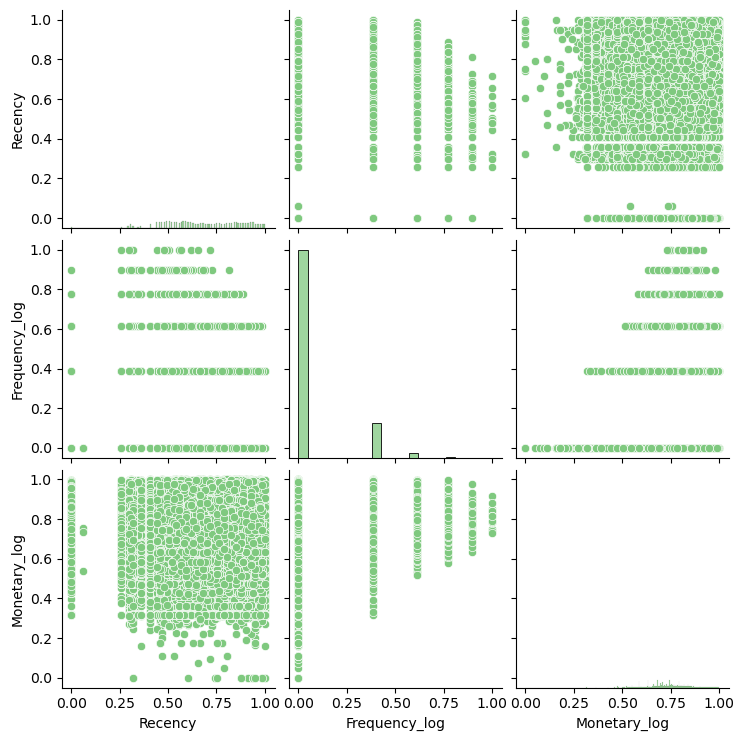

In [309]:
# Viewing a scatterplot matrix for the features
sns.pairplot(data=scaled_df)
plt.show()

There are no clear cluster patterns in the scatterplots of each variable with each other. The lines in the freuquency_log plots are due to there only being 6 frequency values in the dataset.

<Axes: >

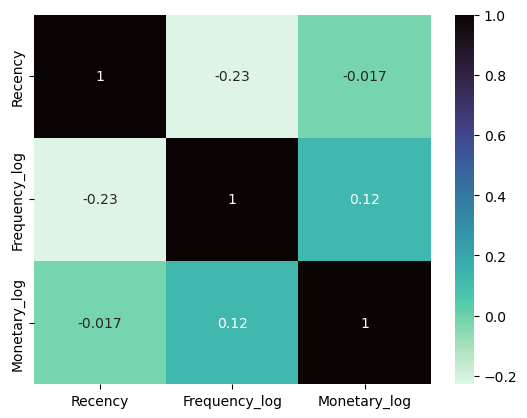

In [310]:
# heatmap of features to view correlations
sns.heatmap(scaled_df.corr(), annot=True, cmap='mako_r')

There is no strong correlation between features. If there was major depencies, one of the features would be removed.

In [311]:
# Displaying unique values and counts of each value for the frequency feature
display(scaled_df['Frequency_log'].unique())
scaled_df['Frequency_log'].value_counts()

array([0.38685281, 0.        , 0.61314719, 0.77370561, 1.        ,
       0.8982444 ])

Frequency_log
0.000000    733378
0.386853    123918
0.613147     16659
0.773706      1693
0.898244       146
1.000000        14
Name: count, dtype: int64

In [312]:
# Displaying distribution statistics for each feautre
scaled_df.describe()

,Recency,Frequency_log,Monetary_log
count,875808.000000,875808.000000,875808.000000
mean,0.682771,0.068060,0.734507
std,0.187925,0.158118,0.104336
min,0.000000,0.000000,0.000000
25%,0.530864,0.000000,0.676980
50%,0.679012,0.000000,0.743329
75%,0.839506,0.000000,0.803623
max,1.000000,1.000000,1.000000


The RSM bins are defined below. 4 different bins are defined for both recency and monetary since their values are fairly well spread across the 0 to 1 interval comapred to the frequency feature. 

The are only 2 bins for frequency since the data is so heavily skewed towards 0. The frequency bin edge is defined as 0.5 to separate the majority of customers with low frequency from the small number with high frequency according to the value counts above.

The recency bin scores are reversed in the get_RFM_scores function below to ensure that recent customers have higher scores.

In [313]:
# Defining bin edges for each featute
recency_bins = [scaled_df['Recency'].min(), np.quantile(scaled_df['Recency'], 0.25), np.quantile(scaled_df['Recency'], 0.5),
                np.quantile(scaled_df['Recency'], 0.75), scaled_df['Recency'].max()]

frequency_bins = [scaled_df['Frequency_log'].min(), 0.5, scaled_df['Frequency_log'].max()]

monetary_bins = [scaled_df['Monetary_log'].min(), np.quantile(scaled_df['Monetary_log'], 0.25), np.quantile(scaled_df['Monetary_log'], 0.5),
                np.quantile(scaled_df['Monetary_log'], 0.75), scaled_df['Monetary_log'].max()]

recency_labels = [1, 2, 3, 4]
frequency_labels = [1, 2]
monetary_labels = [1, 2, 3, 4]

In [314]:
# Creating a function to group RFM values into bins
def get_RFM_scores(df, bins, labels):
    '''This function takes a dataframe, a list of bin edges, and labels for bin output as the inputs. It returns a dataframe that contains
    each of the columns regrouped into the specified bins with the corresponding labels as values.
    
    Args:
        df(DataFrame): dataframe with columns to be binned.
        bins(list): list of lists that each specify bin edges for each df column.
        labels(list): list of lists that contain labels for each column
        
    Returns:
        DataFrame with columns grouped into specified bins with labels as new values.
    
    Notes: *The recency column must be named "Recency" in order for the function to identify it and convert the scores to the proper 
    direction.
    '''
    scores = []
    bin_count = 0
    label_count = 0
    # Getting scores binned scores for each column
    for col in df:
        score = pd.cut(x = df[col], bins=bins[bin_count], labels=labels[label_count], include_lowest=True)
        # Converting score to proper direction for Recency column only
        if col == 'Recency':
            score = 4 - score.astype('int') + 1    
        scores.append(score)
        bin_count += 1
        label_count += 1
    # Creating dataframe with scores for R, F and M
    RFM_scores = pd.DataFrame(scores).transpose()
    return RFM_scores

In [315]:
# Calculating RFM scores using function
RFM_scores = get_RFM_scores(scaled_df, bins=[recency_bins, frequency_bins, monetary_bins], 
                           labels=[recency_labels, frequency_labels, monetary_labels])
# CHecking that output for specific customer is correctly binned
RFM_scores.loc['C1010011', :]

Recency          4
Frequency_log    1
Monetary_log     4
Name: C1010011, dtype: int64

In [316]:
# Values to compare above
scaled_df.loc['C1010011', :]

Recency          0.308642
Frequency_log    0.386853
Monetary_log     0.855498
Name: C1010011, dtype: float64

As shown above the values are correctly binned according to the specified bin edges. The features are now ready for clustering.

In [317]:
RFM_scores.describe()

,Recency,Frequency_log,Monetary_log
count,875808.000000,875808.000000,875808.000000
mean,2.520958,1.021137,2.497952
std,1.118470,0.143841,1.118823
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000
50%,3.000000,1.000000,2.000000
75%,4.000000,1.000000,3.000000
max,4.000000,2.000000,4.000000


## Modeling

The K-Means clustering model will be used because it works efficiently on large datasets and generally results in tight clusters. It is also very interpretable. It's main downside is having to specify the number of clusters before modeling, but this can be optimized using the elbow method.

The elbow method finds the optimal tradeoff point between minimizing inertia (measure of distance between cluster points and centroid) and increasing the number of clusters (k). 

In [318]:
from sklearn.cluster import KMeans
# Calculating inertia for different number of clusters k
inertia = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=20)
    model.fit(RFM_scores)
    inertia.append(model.inertia_)

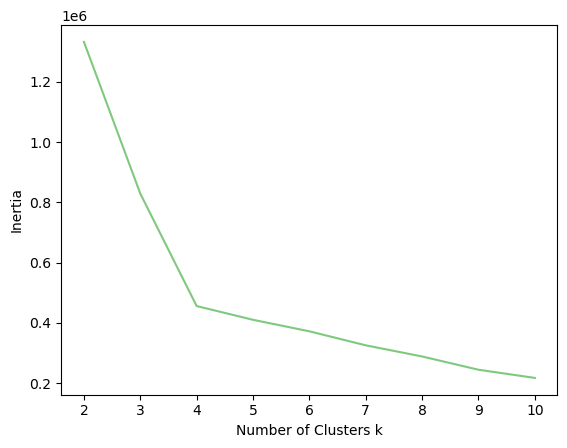

In [319]:
# Visualizing optimal k using elbow method
sns.lineplot(x=range(2, 11), y=inertia, markers=True)
plt.xlabel('Number of Clusters k')
plt.ylabel('Inertia')
plt.show()

In [320]:
# Display inertia values
inertia

[1332906.3370764623,
 829127.5637930292,
 455712.8632158764,
 410108.74852503,
 371894.9074677397,
 325335.3778979999,
 288308.81040233304,
 244284.00032569657,
 217108.78432399966]

From the elbow plot above it seems like the optimal number of clusters is 4 since that is where the 'elbow' of the plot is located. 

We will also use the silhouette scores to choose an appropriate number of clusters. The silhouette score looks at minimizing intra-cluster distance (to data points in same cluster) and maximize inter-cluster distance (to points in neareast neighbouring cluster). Scores closest to 1 represent better clustering.

There are too many data points to compute the silhouette scores as that computation is too intensive. A 10% sample of the data will be taken to calculate silhouette scores.

In [321]:
# Taking random sample to calculate silhouette scores
RFM_scores_sample = RFM_scores.sample(frac=0.01, replace=False, random_state=20)
# The distribution stats are almost identical to whole dataset
RFM_scores_sample.describe()

,Recency,Frequency_log,Monetary_log
count,8758.000000,8758.000000,8758.000000
mean,2.506280,1.020438,2.503654
std,1.121955,0.141503,1.119725
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3.000000,1.000000,3.000000
75%,4.000000,1.000000,4.000000
max,4.000000,2.000000,4.000000


In [322]:
# Calculating silhouette score for range of k values
from sklearn.metrics import silhouette_score
scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=20)
    model.fit(RFM_scores_sample)
    sil = silhouette_score(RFM_scores_sample, model.labels_, metric='euclidean')
    scores.append(sil)

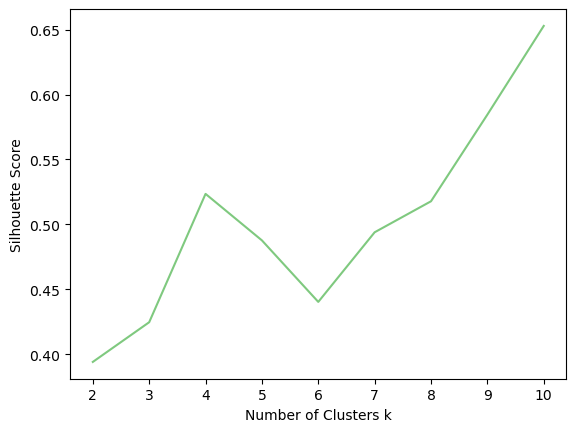

In [323]:
# Visualizing optimal k using silhouette score
sns.lineplot(x=range(2, 11), y=scores, markers=True)
plt.xlabel('Number of Clusters k')
plt.ylabel('Silhouette Score')
plt.show()

There is a local maximum at 4 clusters. Both the elbow plot and silhouette scores indicate that 4 clusters is a good choice. We will nonetheless compute the clusters for k=3 and k=5 to compare to k=4.

In [324]:
# Creating function for clustering with different k values and returning df 
# with assigned clusters
def get_cluster_df(k, df):
    # Fit k-means with k clusters
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=20)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    # Adding cluster labels to supplied df
    df_clusters = df.assign(Cluster=cluster_labels)
    return df_clusters

In [325]:
# Performing clustering and obtaining cluster labels
df_k3 = get_cluster_df(3, RFM_scores)
df_k4 = get_cluster_df(4, RFM_scores)
df_k5 = get_cluster_df(5, RFM_scores)
display(df_k3.head(), df_k4.head(), df_k5.head())

,Recency,Frequency_log,Monetary_log,Cluster
CustomerID,,,,
C1010011,4,1,4,2
C1010012,2,1,4,2
C1010014,1,1,3,1
C1010018,4,1,1,0
C1010024,2,1,4,2


,Recency,Frequency_log,Monetary_log,Cluster
CustomerID,,,,
C1010011,4,1,4,3
C1010012,2,1,4,2
C1010014,1,1,3,2
C1010018,4,1,1,0
C1010024,2,1,4,2


,Recency,Frequency_log,Monetary_log,Cluster
CustomerID,,,,
C1010011,4,1,4,3
C1010012,2,1,4,2
C1010014,1,1,3,2
C1010018,4,1,1,0
C1010024,2,1,4,2


In [326]:
# Creating function to get mean of features for each k value
def mean_feature_df(df_k):
    df_k_avg = df_k.groupby('Cluster').mean()
    df_k_avg.rename(columns={'Recency':'Avg_Recency', 'Monetary_log':
                             'Avg_Monetary', 'Frequency_log':'Avg_Frequency'}, 
                    inplace=True)
    return df_k_avg

In [327]:
# Calculating mean RFM values for each cluster number
df_k3_avg = mean_feature_df(df_k3)
df_k4_avg = mean_feature_df(df_k4)
df_k5_avg = mean_feature_df(df_k5)
display(df_k3_avg)
display(df_k4_avg)
display(df_k5_avg)

,Avg_Recency,Avg_Frequency,Avg_Monetary
Cluster,,,
0,3.600945,1.031325,1.814379
1,1.399342,1.003715,1.783573
2,2.525697,1.026818,3.668422


,Avg_Recency,Avg_Frequency,Avg_Monetary
Cluster,,,
0,3.498374,1.023324,1.509632
1,1.496431,1.003996,1.487835
2,1.495572,1.008762,3.502779
3,3.496796,1.046879,3.498613


,Avg_Recency,Avg_Frequency,Avg_Monetary
Cluster,,,
0,4.000000,1.030301,1.514924
1,1.323966,1.004498,1.654911
2,1.495572,1.008762,3.502779
3,3.496796,1.046879,3.498613
4,2.667677,1.011785,1.336759


From the avg RFM values for each number of clusters we see that k=4 returns clusters with a good range for Recency and Monetary. 5 clusters provides slightly more information but not enough to warrant the additional cluster.

Since the frequency is so heavily skewed to the left, the average frequency for all clusters is around 1.

In [328]:
def plot_clusters(df, k):
    sns.scatterplot(data=df, x='Monetary_log', y='Recency', hue='Cluster', palette='Accent')
    plt.xlabel('Monetary_log')
    plt.ylabel('Recency')
    plt.title(f"{k} Clusters")
    plt.show()

In [329]:
# Plotting clusters for each k
# plot_clusters(df_k4, 4)

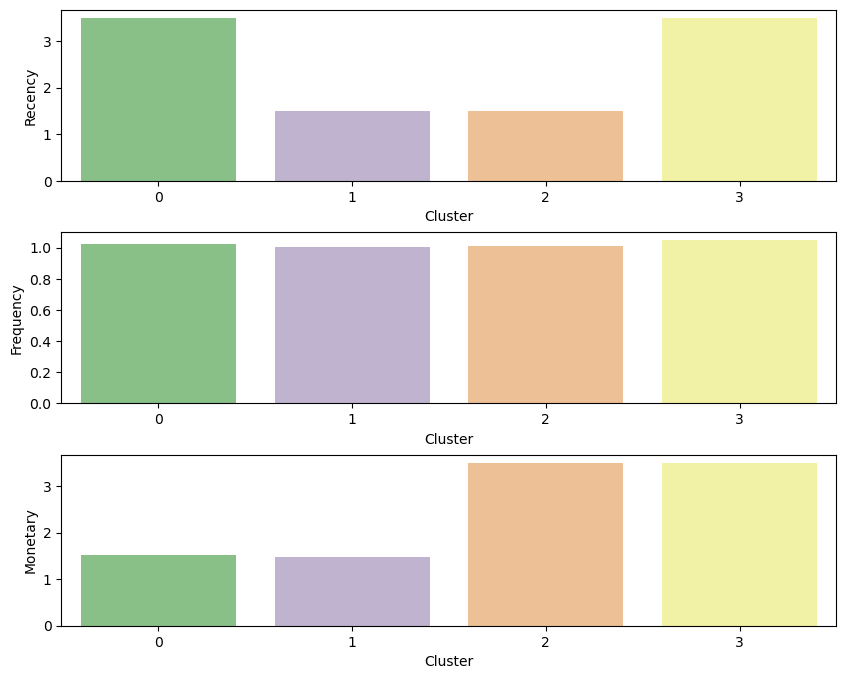

In [330]:
# Plotting the mean RFM scores for each cluster for visualization
plt.figure(figsize=(10, 8))

# Plotting mean Recency
plt.subplot(3, 1, 1)
sns.barplot(data=df_k4_avg, x=df_k4_avg.index, y='Avg_Recency')
plt.xlabel('Cluster')
plt.ylabel('Recency')

# Plotting mean frequency
plt.subplot(3, 1, 2)
sns.barplot(data=df_k4_avg, x=df_k4_avg.index, y='Avg_Frequency')
plt.xlabel('Cluster')
plt.ylabel('Frequency')

# Plotting mean monetary
plt.subplot(3, 1, 3)
sns.barplot(data=df_k4_avg, x=df_k4_avg.index, y='Avg_Monetary')
plt.xlabel('Cluster')
plt.ylabel('Monetary')

plt.subplots_adjust(hspace=0.3)
plt.show()

There is not enough variation in the frequency values as they are similar for all clusters. This is unlikely to be the case in a real-world dataset that spans a greater time range. Because of this, only recency and monetary will be discussed for each cluster.

From the average RFM scores in the plot above we can make the following conclusions about the clusters:

- **Cluster 0 (high recency, low monetary)**: these customers have purchased recently but do not spend much on average. They are therefore **recent low-value** customers. They should be targeted with promotions that reward higher spending. 

- **Cluster 1 (low recency, low monetary)**: these customers spend the least on average and have not purchased recently. They are therefore our **lowest value** customers. They can still be targeted with small promotions to try and increase their transaction activity.

- **Cluster 2 (low recency, high monetary)**: these customers spend a lot on average but have not purchased recently. They are therefore **at-risk high-value** customers. It is likely that these individuals are using other banks services. They should therefore be targeted with promotional offerings to increase there usage of our banks products.

- **Cluster 3 (high recency, high monetary)**: these customers spend the most on average and have purchased most recently. They are the **most valuabe customers (MVCs)**. The possibility of a special rewards program for these important customers should be looked into.

In [331]:
# Looking at percentage of customers in each category
cluster_percent = df_k4['Cluster'].value_counts(normalize=True)
display(cluster_percent.sort_index())
# Putting cluster percentages into list
cluster_percent_list = cluster_percent.sort_index().to_list()
cluster_percent_list = [i * 100 for i in cluster_percent_list]
cluster_percent_list = [round(num, 1) for num in cluster_percent_list]
cluster_percent_list

Cluster
0    0.253143
1    0.247747
2    0.240179
3    0.258930
Name: proportion, dtype: float64

[25.3, 24.8, 24.0, 25.9]

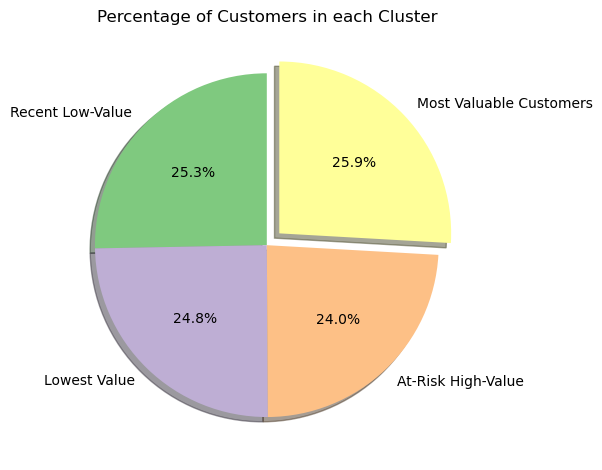

In [335]:
# Visualizing customer perventage in each cluster with pi chart
labels = ['Recent Low-Value', 'Lowest Value', 'At-Risk High-Value', 'Most Valuable Customers']
percents = cluster_percent_list
# "exploding" 1st slice
explode = (0, 0, 0, 0.1)

fig, ax = plt.subplots()
ax.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title("Percentage of Customers in each Cluster")
plt.tight_layout()
plt.show()

## Recommendations

It is recommended that personalized marketing strategies be conducted for each of the customer groups as outlined in the previous section.

It is seen in the pie chart above that each cluster has a similar percentage of customers. This can often occur when using the KMeans algorithm which tends to make clusters of similar sizes. Different clustering algorithms could be used like DBSCAN to investigate other cluster groupings. However, beacuse we have scored the customers using RFM, a large number of clusters will simply result in a cluster for each possible RFM score combination.

This workflow should be performed regularly in collaboration with the marketing team. This will allow for regular updates to the groups in which a customer is clustered based on changes in transaction behaviour. A system to track changes in customer transaction behaviour could also be implemented to evaluate the effective of the implemented targeted marketing strategies.